In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

from src.visual_utils import plot_data_bar, plot_data_line, plot_data_line_multiple, plot_by_segment
from src.stats_utils import calculate_retention, print_basic_stats

In [2]:
files = glob.glob("data/raw/*.csv.gz")


dfs = [pd.read_csv(f, compression="gzip") for f in files]
df = pd.concat(dfs)

df["install_date"] = pd.to_datetime(df["install_date"])
df["event_date"] = pd.to_datetime(df["event_date"])

# Add a new column for later use.
df["days_after_install"] = (df["event_date"] - df["install_date"]).dt.days

In [3]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["install_day"] = df["install_date"].dt.dayofweek.map(lambda x: days_of_week[x])

A very interesting finding: Players play the most in the weekday they started.  
For example, players who installed the game on Wednesday plays the game on wednesday more than other days of the week.  
And this is true for every day of the week.  
Note: This may not be true for every individual player, but the pattern follows for the players as a whole.

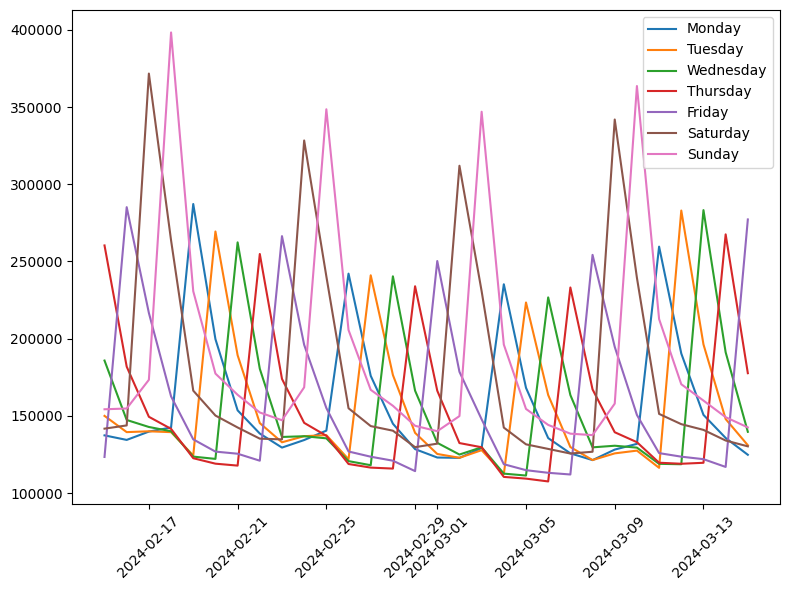

In [4]:
def match_count(segment_df: pd.DataFrame) -> pd.Series:
    match_start_count = segment_df.groupby("event_date")["match_start_count"].sum()
    return match_start_count

plot_by_segment(df, days_of_week, "install_day", match_count)